In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [3]:
def calc_logloss(y, y_pred):
  err=0
  for i in range(y.shape[0]):
    if (y[i]==0. and y_pred[i]==1.) or (y[i]==1. and y_pred[i]==0.):
      err=10000
      return err
    if (y[i]==0. and y_pred[i]==0.) or (y[i]==1. and y_pred[i]==1.):
      err +=0
    else:
      err += y[i] * np.log(y_pred[i]) + (1.0 - y[i]) * np.log(1.0 - y_pred[i])
    
    
  err = -err/y.shape[0]

  return err

In [4]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    mas_err = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        mas_err.append(err)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    return W, mas_err

In [7]:
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=1)
# перемешивание датасета
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

In [8]:
def calc_pred_proba(W, X):
  y_pred_proba = sigmoid(np.dot(W, X))
  return y_pred_proba

In [9]:
def calc_pred(w, X):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
#     За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
    
    return y_predicted

In [10]:
X_train=X_train.T
y_train = y_train.T
W, err = eval_model(X_train, y_train, iterations=10000, alpha=0.05)

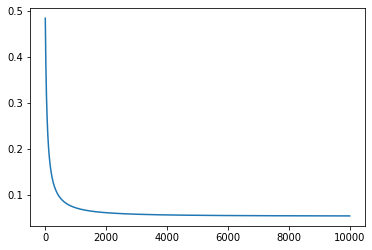

In [11]:
plt.plot(range(len(err)), err)

In [12]:
submissions = calc_pred(W, X_train)
submissions = submissions.squeeze()
TP = 0
TN = 0
FP = 0
FN = 0
for i, k in zip(y_train, submissions):
    if i==1 and k==1:
       TP += 1
    if i==0 and k==0:  
       TN+=1
    if i==0 and k==1:
       FP+=1
    if i==1 and k==0:
       FN+=1
  
print("TP=", TP)
print("TN=" ,TN)
print("FP=", FP)
print("FN=", FN)

TP= 33
TN= 36
FP= 0
FN= 1


In [18]:

precision = TP/(TP+FP)
recall = TP/(TP+FN)
accuracy = (TP+TN)/y_train.shape[0]
F1 = 2*(precision*recall/(precision+recall))

print("precision=", precision)
print("recall=",recall)
print("accuracy=",accuracy)
print("F1=", F1)

precision= 1.0
recall= 0.9705882352941176
accuracy= 0.9857142857142858
F1= 0.9850746268656716


Проверка на тесте:

In [19]:
X_test=X_test.T
y_test = y_test.T
submissions = calc_pred(W, X_test)
submissions = submissions.squeeze()
TP = 0
TN = 0
FP = 0
FN = 0
for i, k in zip(y_test, submissions):
    if i==1 and k==1:
       TP += 1
    if i==0 and k==0:  
       TN+=1
    if i==0 and k==1:
       FP+=1
    if i==1 and k==0:
       FN+=1
  
print("TP=", TP)
print("TN=" ,TN)
print("FP=", FP)
print("FN=", FN)

TP= 15
TN= 14
FP= 0
FN= 1


In [21]:

precision = TP/(TP+FP)
recall = TP/(TP+FN)
accuracy = (TP+TN)/y_test.shape[0]
F1 = 2*(precision*recall/(precision+recall))

print("precision=", precision)
print("recall=",recall)
print("accuracy=",accuracy)
print("F1=", F1)

precision= 1.0
recall= 0.9375
accuracy= 0.9666666666666667
F1= 0.967741935483871


На тесте accuracy меньше, это означает, что модель могла переобучиться. Возможно это связано с небольшим датасетом и отсутствием регуляризации.